#### Problem Statement
Analyze the data and show sales trend over the months

Derive insights from visualizations of sales by country to show sales growth patterns across different countries

Use these insights to give recommendations on how to cut costs and optimize sales

#### Problem Framing

Approach the problem by taking the following steps:


- Clean the data and get the sales amount in a new column (product of Price and Quantity)

- Drill down on each column and make sure the entries are valid

- Observe the distribution of values in the numeric columns, and show countplots of relevant categorical columns, if any.

- Create relevant charts to visualize trends and generate insights

- Give recommendations




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Online Retail data.csv", encoding="ISO-8859-1")
df.head(20)

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\1946601803.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Online Retail data.csv", encoding="ISO-8859-1")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45,$6.95,13085.0,UK
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45,$6.75,13085.0,UK
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45,6.75,13085.0,UK
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45,2.1,13085.0,UK
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45,1.25,13085.0,UK
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/01/2009 07:45,1.65,13085.0,UK
6,489434,21871,SAVE THE PLANET MUG,24,12/01/2009 07:45,1.25,13085.0,UK
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/01/2009 07:45,5.95,13085.0,UK
8,489435,22350,CAT BOWL,12,12/01/2009 07:46,2.55,13085.0,UK
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/01/2009 07:46,3.75,13085.0,UK


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  object 
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.1+ MB


In [4]:
cat_columns = [i for i in df.select_dtypes(include=["object", "category"]).columns]
cat_columns

['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Price', 'Country']

In [5]:
for column in cat_columns:
    print(f"Unique values in {column} and their counts:\n{df[column].value_counts()}\n")

Unique values in Invoice and their counts:
537434     675
538071     652
537638     601
537237     597
536876     593
          ... 
523981       1
523984       1
523985       1
C523988      1
C516462      1
Name: Invoice, Length: 28816, dtype: int64

Unique values in StockCode and their counts:
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: StockCode, Length: 4632, dtype: int64

Unique values in Description and their counts:
WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom

In [6]:
df["Price ($)"] = df["Price"].astype("str").str.replace("$","", regex=False).astype("float64")

In [7]:
df.drop(["Price"], axis=1, inplace=True)

In [8]:
df.dropna(how="all", inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df["Sales ($)"] = df["Quantity"] * df["Price ($)"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Customer ID,Country,Price ($),Sales ($)
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45,13085.0,UK,6.95,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45,13085.0,UK,6.75,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45,13085.0,UK,6.75,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45,13085.0,UK,2.10,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45,13085.0,UK,1.25,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/09/2010 20:01,17530.0,United Kingdom,2.95,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/09/2010 20:01,17530.0,United Kingdom,3.75,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/09/2010 20:01,17530.0,United Kingdom,3.75,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/09/2010 20:01,17530.0,United Kingdom,3.75,7.50


In [10]:
df["Country"] = df["Country"].replace({"UK":"United Kingdom"})

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Customer ID,Country,Price ($),Sales ($)
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45,13085.0,United Kingdom,6.95,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45,13085.0,United Kingdom,6.75,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45,13085.0,United Kingdom,6.75,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45,13085.0,United Kingdom,2.10,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45,13085.0,United Kingdom,1.25,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/09/2010 20:01,17530.0,United Kingdom,2.95,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/09/2010 20:01,17530.0,United Kingdom,3.75,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/09/2010 20:01,17530.0,United Kingdom,3.75,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/09/2010 20:01,17530.0,United Kingdom,3.75,7.50


In [12]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [13]:
df.describe()

,Quantity,Customer ID,Price ($),Sales ($)
count,518596.000000,410763.000000,518596.000000,518596.000000
mean,10.438152,15353.621857,4.716176,18.329828
std,108.126593,1681.657665,147.090460,161.380401
min,-9600.000000,12346.000000,-53594.360000,-53594.360000
25%,1.000000,13979.000000,1.250000,3.750000
50%,3.000000,15311.000000,2.100000,10.080000
75%,10.000000,16797.000000,4.210000,17.700000
max,19152.000000,18287.000000,25111.090000,25111.090000


We have some entries in the data having non-positive quantity or non-positive price. These do not make sense in the context of sales, so we will drop them

In [14]:
invalid_quantity = df["Quantity"]<=0 | df["Quantity"].isna()
invalid_price = df["Price ($)"]<=0 | df["Price ($)"].isna()

df.drop(df[invalid_quantity].index, inplace=True)
df.drop(df[invalid_price].index, inplace=True)
df.describe()

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\3644863396.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[invalid_price].index, inplace=True)


,Quantity,Customer ID,Price ($),Sales ($)
count,504731.000000,400916.000000,504731.000000,504731.000000
mean,11.516923,15361.544074,4.274692,20.351705
std,87.337497,1680.635823,64.093333,91.510976
min,1.000000,12346.000000,0.001000,0.001000
25%,1.000000,13985.000000,1.250000,4.200000
50%,3.000000,15311.000000,2.100000,10.200000
75%,12.000000,16805.000000,4.210000,17.700000
max,19152.000000,18287.000000,25111.090000,25111.090000


In [15]:
sum(df["Description"].isna())

0

In [16]:
df["Customer ID"] = df["Customer ID"].astype(str)

In [17]:
df.describe()

,Quantity,Price ($),Sales ($)
count,504731.000000,504731.000000,504731.000000
mean,11.516923,4.274692,20.351705
std,87.337497,64.093333,91.510976
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,4.200000
50%,3.000000,2.100000,10.200000
75%,12.000000,4.210000,17.700000
max,19152.000000,25111.090000,25111.090000


In [18]:
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504731 entries, 0 to 504730
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      504731 non-null  object        
 1   StockCode    504731 non-null  object        
 2   Description  504731 non-null  object        
 3   Quantity     504731 non-null  int64         
 4   InvoiceDate  504731 non-null  datetime64[ns]
 5   Customer ID  504731 non-null  object        
 6   Country      504731 non-null  object        
 7   Price ($)    504731 non-null  float64       
 8   Sales ($)    504731 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 34.7+ MB


In [19]:
df.to_csv("cleaned_online_retail_data.csv")

In [20]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Customer ID,Country,Price ($),Sales ($)
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,13085.0,United Kingdom,6.95,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,13085.0,United Kingdom,6.75,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,13085.0,United Kingdom,6.75,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,13085.0,United Kingdom,2.10,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,13085.0,United Kingdom,1.25,30.00
...,...,...,...,...,...,...,...,...,...
504726,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,17530.0,United Kingdom,2.95,5.90
504727,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,17530.0,United Kingdom,3.75,3.75
504728,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,17530.0,United Kingdom,3.75,3.75
504729,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,17530.0,United Kingdom,3.75,7.50


#### Data Exploration

In [21]:
df.describe()

,Quantity,Price ($),Sales ($)
count,504731.000000,504731.000000,504731.000000
mean,11.516923,4.274692,20.351705
std,87.337497,64.093333,91.510976
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,4.200000
50%,3.000000,2.100000,10.200000
75%,12.000000,4.210000,17.700000
max,19152.000000,25111.090000,25111.090000


In [22]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

#### Some Observations
- Unit Price of stock in the entries range from 0.001 USD to 25,111.09 USD, with an average of 4.27 USD. Sales also have the same min to max range, but with an average of 20.35 USD.

- Quantity of items bought range from 1 to 19,152 at a time.

- Data entries spanned from December 2009 to December 2010, roughly one year.

In [23]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

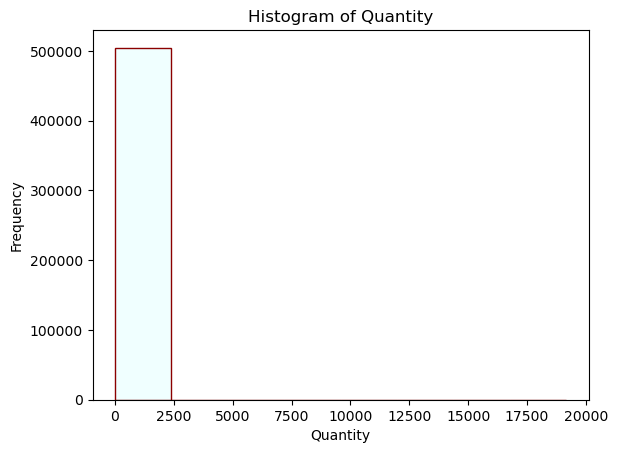

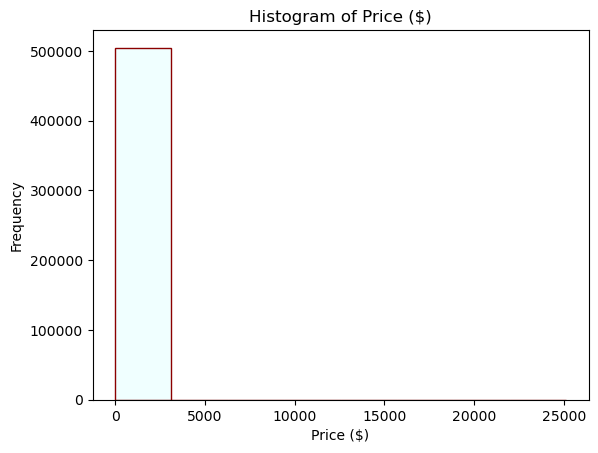

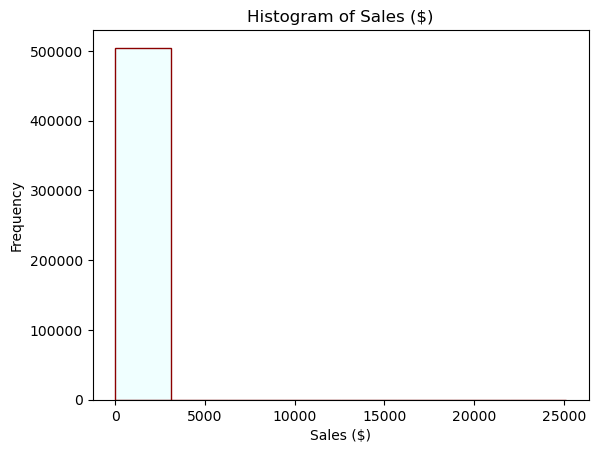

In [24]:
for column in numeric_columns:
    plt.hist(df[column], bins=8, color='azure', edgecolor='darkred')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The histograms of these numeric columns look weird - they are extremely right-skewed?

I wil use a boxplot of one of them to see things from another angle

<AxesSubplot:>

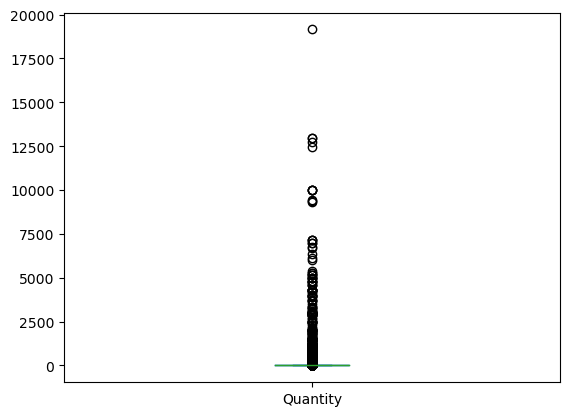

In [25]:
df["Quantity"].plot(kind="box")

In [26]:
df["Quantity"].describe()

count    504731.000000
mean         11.516923
std          87.337497
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

They are indeed extremely right-skewed. The values in the numeric columns are distributed in such a way that the overwhelming majority are within a small range very close to the distribution's lower bound. The remaining values are extremely spread out - outliers.

To visualize the small range containing most of the values, I will plot histograms of these columns without the outliers by removing them first.

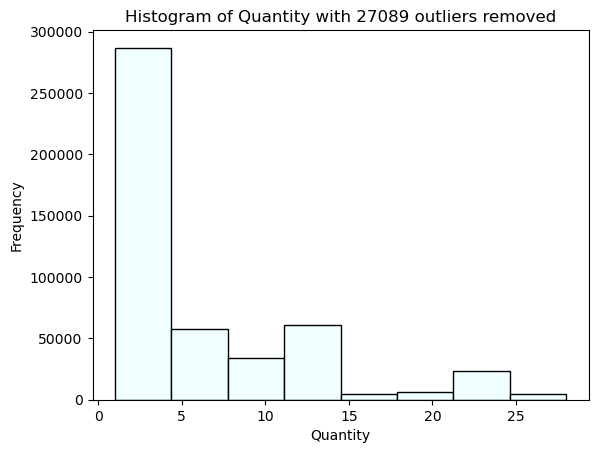

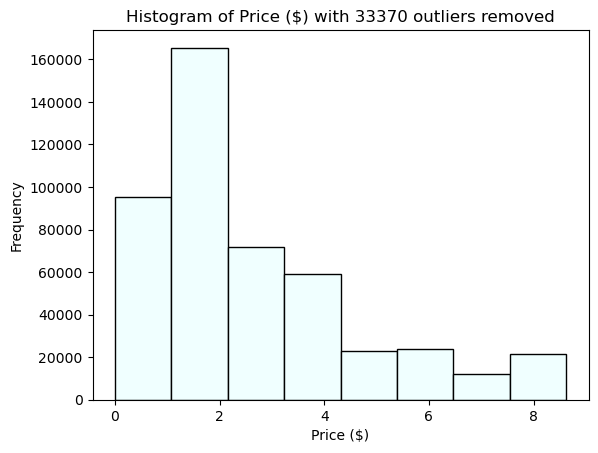

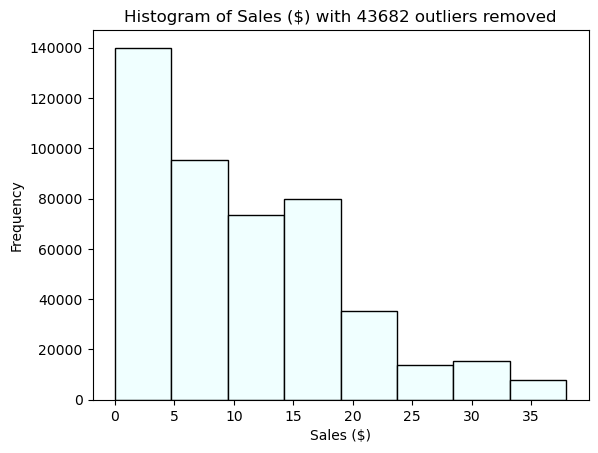

In [27]:
def remove_outliers(series):    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_series = series[(series >= lower_bound) & (series <= upper_bound)]
    
    return filtered_series

for column in numeric_columns:
    updated_column = remove_outliers(df[column])
    plt.hist(updated_column, bins=8, color='azure', edgecolor='k')
    plt.title(f'Histogram of {column} with {len(df[column]) - len(updated_column)} outliers removed')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
for column in numeric_columns:
    updated_column = remove_outliers(df[column])
    print(f"percentage of {column} without outliers = {(len(updated_column)/len(df[column]))*100:.2f}%",
         f"\nmax = {max(updated_column)}")

percentage of Quantity without outliers = 94.63% 
max = 28
percentage of Price ($) without outliers = 93.39% 
max = 8.62
percentage of Sales ($) without outliers = 91.35% 
max = 37.95


#### Further observations on price, sales and quantity
- The distribution of values without outliers are also generally right-skewed.
- Most of the unit prices (~93%) are ~8.6 USD or less, with majority falling within the 0 to 4 USD range
- Most of the sales (~91%) are less than 38 USD, majority of these fall into the 0 to 20 USD range
- Most of the item quantities per sale (~94) are less 28, majority less than 5

### Questions and Answers

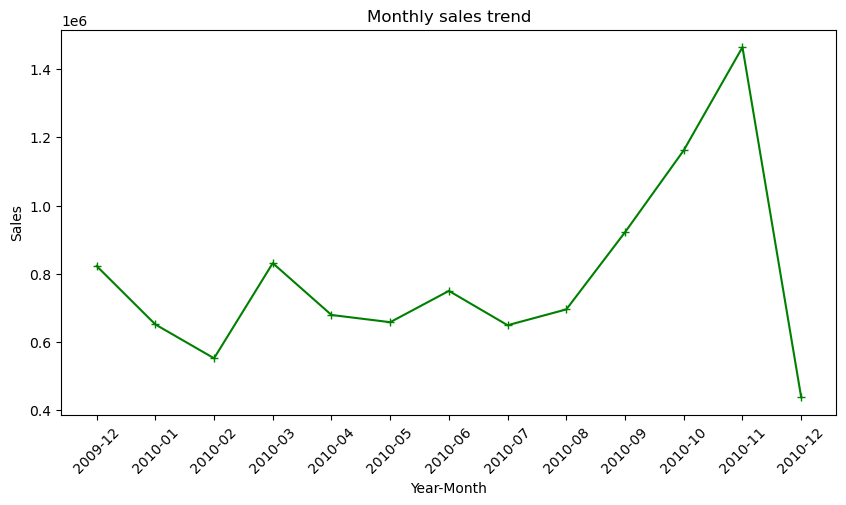

In [29]:
#What is the sales trend by month?

sales = df["Sales ($)"]
df["month_year"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("month_year")["Sales ($)"].sum()
monthly_sales = monthly_sales.set_axis(monthly_sales.index.astype(str))

plt.figure(figsize = (10,5))
plt.plot(monthly_sales, "g+-")
plt.title("Monthly sales trend")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

The trend shows an appreciable and steady increase in monthly sales from July to November. The apparent "decline" in sales for December 2010 cannot be taken at face value because the data only includes entries for the first few days of that month.

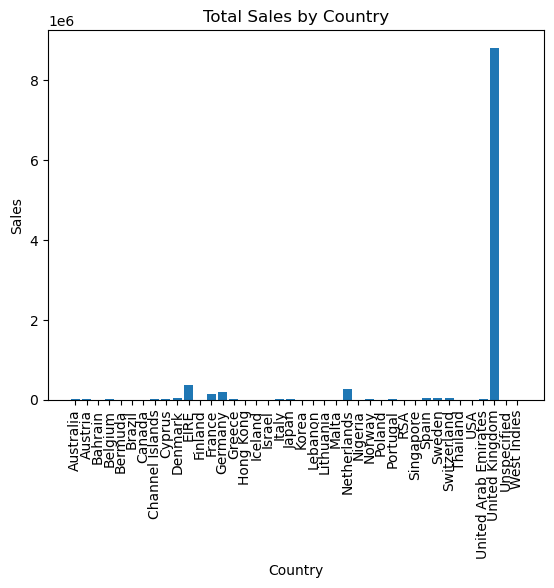

In [30]:
# What is the total sales by country?

country_sales = df.groupby("Country")["Sales ($)"].sum()
plt.bar(country_sales.index, country_sales.values)
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

Most of the sales were in the United kingdom
Let's see the sales distribution for other countries outside the UK


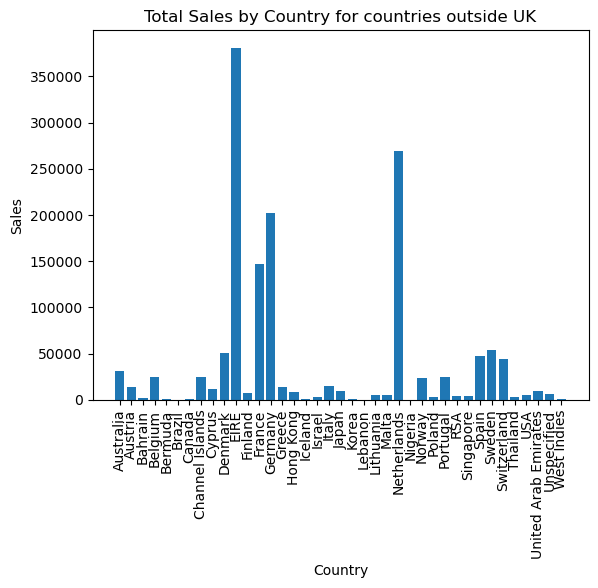

In [31]:
# Sales by country for countries outside the UK

other_countries = df[df["Country"] != "United Kingdom"]
other_country_sales = other_countries.groupby("Country")["Sales ($)"].sum()
plt.bar(other_country_sales.index, other_country_sales.values)
plt.title("Total Sales by Country for countries outside UK")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

The top four countries by sales volume have significantly more sales than other countries

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\253120416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")


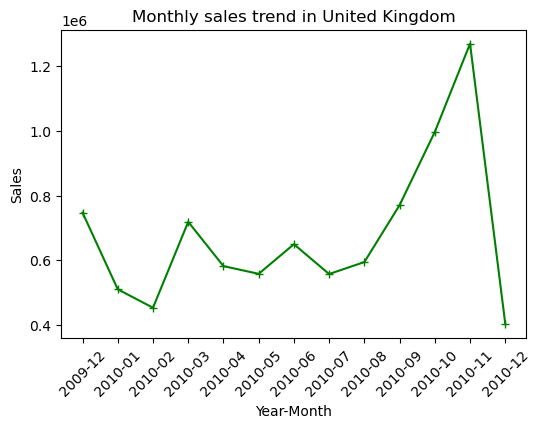

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\253120416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")


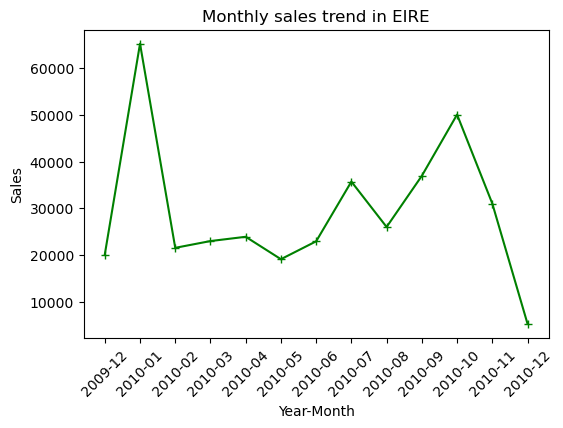

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\253120416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")


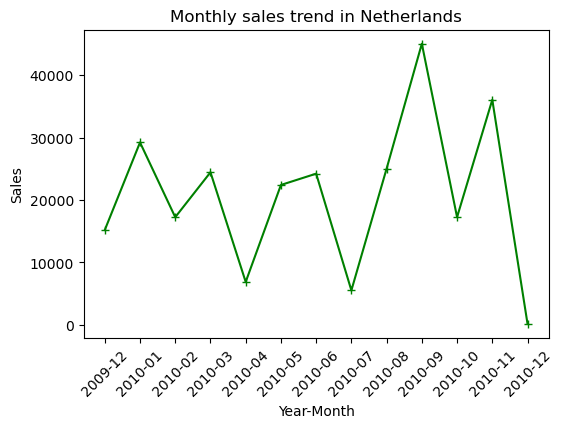

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\253120416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")


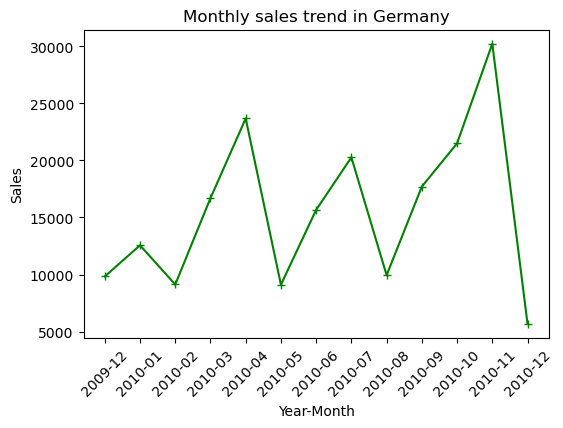

C:\Users\toluw\AppData\Local\Temp\ipykernel_6556\253120416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")


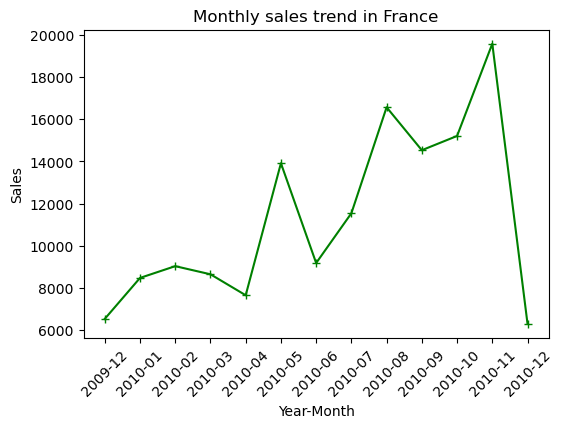

In [32]:
#What is the sales performance for the top 5 coutries by sale?

top_five_countries = country_sales.nlargest(5)

for country in top_five_countries.index:
    country_data = df[df["Country"] == country]
    sales = country_data["Sales ($)"]
    country_data["month_year"] = country_data["InvoiceDate"].dt.to_period("M")
    monthly_sales = country_data.groupby("month_year")["Sales ($)"].sum()
    monthly_sales = monthly_sales.set_axis(monthly_sales.index.astype(str))

    plt.figure(figsize = (6,4))
    plt.plot(monthly_sales, "g+-")
    plt.title(f"Monthly sales trend in {country}")
    plt.xlabel("Year-Month")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

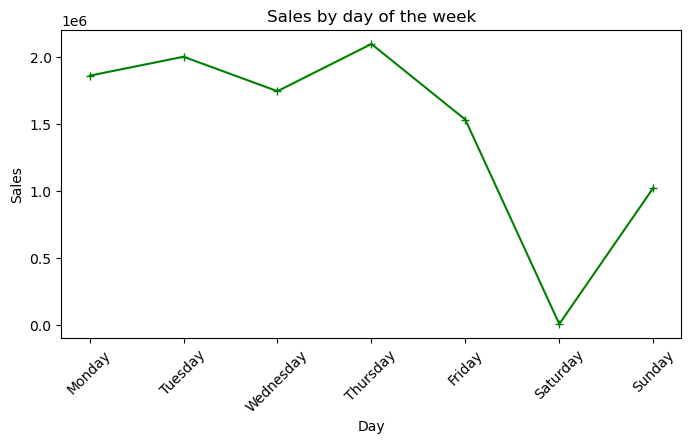

In [33]:
# What is volume of sales by day of the week?

sales = df["Sales ($)"]
df["weekday"] = df["InvoiceDate"].dt.dayofweek
daily_sales = df.groupby("weekday")["Sales ($)"].sum().sort_index()
daily_sales = daily_sales.set_axis(
    map(
        lambda i: ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"][i], list(daily_sales.index)
    )
)

plt.figure(figsize = (8,4))
plt.plot(daily_sales, "g+-")
plt.title("Sales by day of the week")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In majority of the top 5 countries by sales, the general trend of increasing sales, especially towards the end of the year, can be observed.

Sales volume by day of week trend shows that most sales happen on weekdays rather than weekends.

#### Recommendations

Based on the insights drawn from the exploration and analysis so far, here are some recommendations for the online retail business:
- Majority of successful sales across all countries are accounted for by low price products (unit price of 8 USD or less) and low quantity orders (28 units or less, with high concentration on 5 items or less). The business should direct more efforts towards the production and distribution of this category of products.
- The general trend of monthly sales show that sales tend to increase in the months towards the end of the year. Systems should be put in place to meet increased demand during this period, especially in the top five countries by sales volume.
- Weekday analysis shows considerably more sales happening on weekdays vs weekends. The business should account for the weekday bustle and make sure that low weekend sales is actually due to low demand and if this is the case, reduce employee volume/work hours during the weekends to cut costs. If low weekend sales turn out to be due to an issue on the part of the business e.g. employee unavailability during weekends, then the business should seek to identify and address the issue.
- The top five countries by sales are United Kingdom, EIRE (Ireland), Netherlands, Germany and France. Sales in these five countries are disproportionately high compared to all other countries. The business will benefit from expanding resources and distributing them more evenly across other countries so they can take advantage of available demand from those countries. Systems in these top 5 countries should also be managed properly to maintain the large sales volume.